## Source

This notebook contains code from: https://github.com/harvardnlp/annotated-transformer

Original license: 

> MIT License
> 
> Copyright (c) 2018 Alexander Rush
> 
> Permission is hereby granted, free of charge, to any person obtaining a copy
> of this software and associated documentation files (the "Software"), to deal
> in the Software without restriction, including without limitation the rights
> to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
> copies of the Software, and to permit persons to whom the Software is
> furnished to do so, subject to the following conditions:
> 
> The above copyright notice and this permission notice shall be included in all
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
> FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
> AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
> LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
> OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
> SOFTWARE.


## License

The new work is licensed under the BSD 3-Clause License.


Copyright (c) 2018, Guillaume Chevalier

All rights reserved.


In [30]:
# !pip install joblib
# !echo "joblib" >> requirements.txt
# !pip freeze | grep -i torch >> requirements.txt
# !pip freeze | grep -i numpy >> requirements.txt
!cat requirements.txt

pytest
pytest-cov
joblib
torch==1.0.0
torchvision==0.2.1
scikit-learn==0.20.1
numpy==1.15.4


In [2]:
from src.data.read_txt import *
from src.data.config import *
from src.data.training_data import *
from src.data.sgnn_projection_layer import *
from src.model.loss import *
from src.model.transformer import *

import numpy as np
from sklearn.metrics import jaccard_similarity_score, f1_score, accuracy_score
from joblib import dump, load
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

import math
import copy
import time

In [3]:
# !pip install snakeviz
# %load_ext snakeviz

In [8]:
preproc_sgnn_sklearn_pipeline, sentence_projection_model = load_most_recent_model(MY_MODEL_NAME, cuda_device_id)

Loaded model from files: my-model.sklearn.epoch_00009 my-model.pytorch.epoch_00009


## Visualize results on some custom data

In [7]:
25000*2 = 50000

# dataset_size = 36000000
batch_size = 25
max_epoch = 24
train_iters_per_epoch = 2400
test_iters_per_epoch = 1
# print(dataset_size/25)  # 1 440 000
# 100000 steps  = 100000*25 sentences = 2 500 000

# so I should have: epoch * steps_per_epochs = 57600

# batch_size = 25 sentences
# train_iters_per_epoch = 40
# test_iters_per_epoch = 1
# max_epoch = 10

# English-French dataset consisting of 36M (36000000) sentences
# Each training batch contained a set of sentence pairs containing approximately 25000 source tokens and 25000 target tokens
# Trained 100,000 steps or 12 hours
# each training step took about 0.4 seconds

SyntaxError: can't assign to operator (<ipython-input-7-e01ac73f82bf>, line 1)

## Visualize the learning rate over time

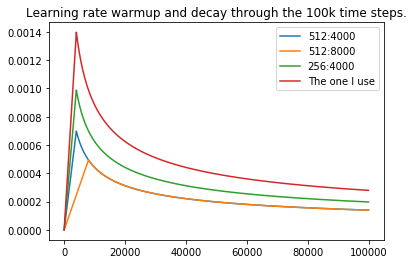

In [9]:
import matplotlib.pyplot as plt
# Three settings of the lrate hyperparameters.
opts = [NoamOpt(512, 1, 4000, None), 
        NoamOpt(512, 1, 8000, None),
        NoamOpt(256, 1, 4000, None),
        get_std_opt(model_trainer)]
plt.plot(np.arange(1, 100000), [[opt.rate(i) for opt in opts] for i in range(1, 100000)])
plt.title("Learning rate warmup and decay through the 100k time steps.")
plt.legend(["512:4000", "512:8000", "256:4000", "The one I use"])
plt.show()